## 7. k近傍法(KNN)
KNNは**怠惰学習**と呼ばれる手法の代表的な例である。  
ノンパラメトリックモデルのサブカテゴリであり、インスタンスに基づく学習と呼ばれる。  
パラメトリックモデルと違い、訓練データからパラメータを推定するものではなく、訓練データセットを記憶する。  
  
1. kの値と距離指数を選択する
2. 分類したいデータ点からk個の最近傍のデータ点を見つけ出す
3. 多数決によりクラスラベルを割り当てる

In [46]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [6]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cuan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8,
                    label=cl, 
                    cmap=cmap,
                    edgecolor='black')

#### 分類

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

knn.fit(X_std[:,[2,3]], y)

new_observation = [1,1]
distance, indices = knn.kneighbors([new_observation])
# X_std[indices]

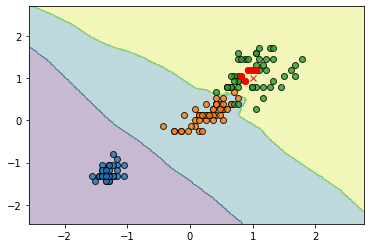

In [30]:
plot_decision_regions(X_std[:,[2,3]], y, classifier=knn);
plt.plot(1, 1, 'rx', lw=3)
plt.plot(X_std[indices,2], X_std[indices,3], 'ro', lw=3);

#### 回帰

In [33]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
X = X[['LSTAT']].values
y = boston.target

In [36]:
def lin_reg_plot(X, y, model, c):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color=c ,lw=2)
    return

In [39]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X, y)

knn_reg.score(X, y)

0.7095408115461865

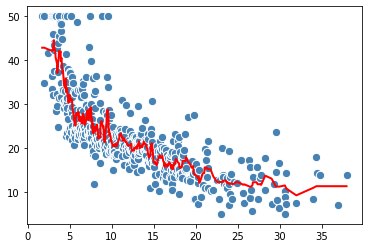

In [40]:
sort_idx = X.flatten().argsort()

lin_reg_plot(X[sort_idx], y[sort_idx], knn_reg, 'red')

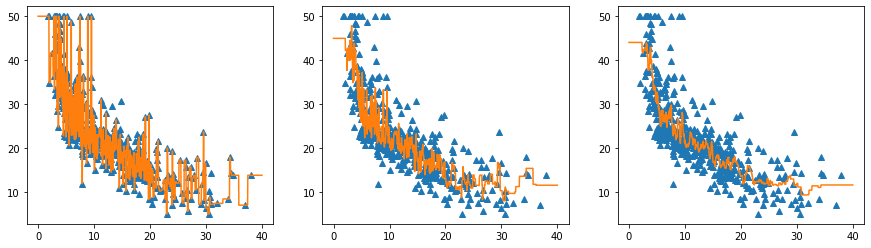

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(0, 40, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X, y)
    ax.plot(X, y, '^')
    ax.plot(line, reg.predict(line))

#### 半径を用いた最近傍クラス分類器（RNN）

In [16]:
from sklearn import datasets

from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
features = iris.data
target = iris.target

standardizer = StandardScaler()
features_standardized = standardizer.fit_transform(features)

rnn = RadiusNeighborsClassifier(radius=.5, n_jobs=-1).fit(features_standardized, target)

new_observation = [1,1,1,1]

rnn.predict([new_observation])

array([2])

In [25]:
?plt.plot